# **California Housing Price (Supervised: Regression)**

- Target: median_house_value
- Feature:
    - longitude
    - latitude
    - housing_median_age
    - total_rooms
    - total_bedrooms
    - population
    - households
    - median_income
    - ocean_proximity
    

## **Business Problem Understanding**
**Context**

The California Housing Price dataset contains information from the 1990 California census. It provides details about housing conditions across different districts, including geographic location, housing characteristics, demographics, and proximity to the ocean. While the data is outdated, it is widely used as a learning resource for machine learning, especially for building regression models to predict housing prices based on various features.

Determining the right house price is a critical factor in the real estate industry. An overpriced house might take a long time to sell, while an underpriced house may lead to reduced profit for the owner. Many factors influence the value of a house, such as location, size, number of bedrooms, population density, and average household income. Understanding these factors can greatly assist property owners, developers, and buyers in making better decisions.

**Problem Statement**

The main challenge in the housing market is determining a fair and competitive house price based on its characteristics. Homeowners and real estate agents often struggle to set the optimal selling price due to significant differences between properties, even within the same area. Without accurate pricing guidance, the listing price might deviate from the actual market value.

**Goals**

Build a regression model that can predict the median house value (`median_house_value`) based on various housing and neighborhood characteristics. This model is expected to help:
- Homeowners set competitive prices.
- Real estate agents recommend appropriate selling or buying prices.
- Potential buyers assess the fair value of a property.

**Analytic Approach**

The steps to be taken include:
1. **Exploratory Data Analysis (EDA)** to understand feature-target relationships and patterns.
2. **Data preprocessing** including handling missing values, encoding categorical variables, and scaling/normalizing features if needed.
3. **Model building** using various regression algorithms (Linear Regression, Ridge, Random Forest Regressor, Gradient Boosting).
4. **Model evaluation** to select the most accurate and robust model.


### **Data Understanding**
- The dataset contains housing data from the California 1990 census.
- Each row represents a district’s housing and demographic information.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Longitude coordinate of the district |
| latitude | Float | Latitude coordinate of the district |
| housing_median_age | Float | Median age of houses in the district |
| total_rooms | Float | Total number of rooms in the district |
| total_bedrooms | Float | Total number of bedrooms in the district |
| population | Float | Total population in the district |
| households | Float | Total number of households in the district |
| median_income | Float | Median household income in the district (in tens of thousands of USD) |
| ocean_proximity | Object | Categorical variable indicating proximity to the ocean |
| median_house_value | Float | Median house value in the district (USD) |

### **Modeling Plan**
The modeling process will follow these steps:

1. **Data Preprocessing**
   - Handle missing values in `total_bedrooms`.
   - Encode categorical feature `ocean_proximity` using one-hot encoding.
   - Filling missing value using KNN Imputer.
   - Apply feature scaling for models sensitive to data scale (e.g., Linear Regression).

2. **Baseline Model**
   - Train a simple **Linear Regression**, **Ridge Regression**, and **Random Forest** models to establish baseline performance.
   - Record RMSE, MAE, and MAPE.

3. **Model Stacking Experimentation**
   - **Random Forest Regressor** for non-linear relationships and feature importance analysis.
   - **Gradient Boosting Models** (e.g., XGBoost) for potentially higher accuracy.

4. **Model Evaluation**
   - Compare performance across all models using cross-validation.
   - Select the best model based on the lowest RMSE and MAPE, balanced with interpretability.

5. **Final Model Deployment**
   - Retrain the best model on the entire training dataset.
   - Save the model for future inference.

### **Evaluation Metrics**

| **Metric** | **Function** | **Reason for Use in This Dataset** | **Interpretation** |
| --- | --- | --- | --- |
| **RMSE** (Root Mean Squared Error) | Measures the square root of the average squared differences between predicted and actual values. Penalizes large errors more heavily. | In housing price prediction, very large errors (e.g., hundreds of thousands USD off) can be highly impactful. RMSE ensures the model avoids such large deviations, especially in high-value areas like coastal districts. | RMSE of 50,000 means the model’s predictions deviate by an average of $50K from the actual median house price. |
| **MAE** (Mean Absolute Error) | Measures the average of absolute differences between predicted and actual values. Treats all errors equally. | Provides a more “realistic” view of the model’s performance across all districts, without being overly affected by extremely expensive or cheap houses. | MAE of 40,000 means predictions are off by $40K on average. |
| **MAPE** (Mean Absolute Percentage Error) | Measures the average percentage error between predicted and actual values. | Allows stakeholders to understand model accuracy in relative terms. Important because the same dollar error has different impacts for cheap vs. expensive houses. | MAPE of 8% means the model is, on average, 8% off from the actual house price. |

## Import Dependencies

In [ ]:
# Basic data manipulation & visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Warning control
import warnings
warnings.filterwarnings("ignore")

# Data splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Ensemble model
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor

# SHAP Analysis
import shap 

# Save model
import joblib


## Load Dataset

In [2]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.describe(include= 'object')

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

We found that there is one column with missing values: total_bedrooms, which has 137 missing entries.

There are no duplicate records in the dataset.

## EDA

### Numerical Columns

In [9]:
# Create variable for numerical colummns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

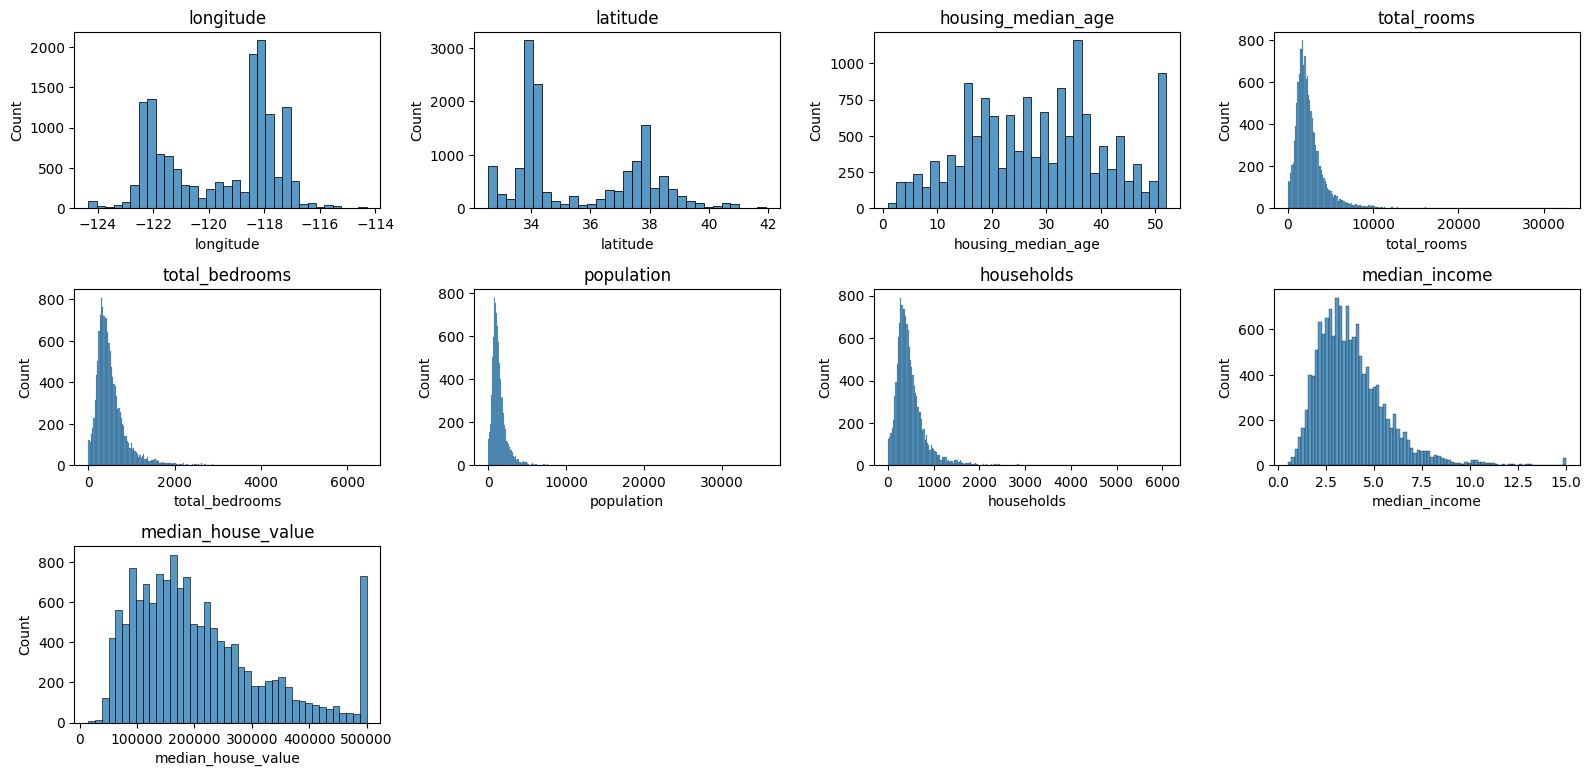

In [10]:
# Histogram for numerical columns
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df, x= col)
    plt.title(col)

plt.tight_layout()

In [11]:
# Check skewness
hist_skew = {
    'Column' : num_cols,
    'Skewness' : df[num_cols].skew().values.round(3)
}

df_hist_skew = pd.DataFrame(hist_skew)
df_hist_skew

,Column,Skewness
0,longitude,-0.304
1,latitude,0.471
2,housing_median_age,0.059
3,total_rooms,3.983
4,total_bedrooms,3.387
5,population,5.458
6,households,3.346
7,median_income,1.629
8,median_house_value,0.982


**Histogram Distribution Insights**

1. **longitude**  
   - Distribution is multimodal, showing several peaks that represent clusters of districts in specific areas of California.  
   - Values range from approximately -124 to -114, consistent with California’s geographic boundaries.

2. **latitude**  
   - Distribution is also multimodal, with large peaks around 34 and 37 degrees latitude.  
   - Indicates population concentration in major metropolitan areas such as Los Angeles and the San Francisco Bay Area.

3. **housing_median_age**  
   - Relatively uniform distribution with peaks at specific ages such as 20, 30, and 50 years.  
   - Many districts have a median housing age of 50, possibly due to an upper recording limit in the census.

4. **total_rooms**  
   - Highly right-skewed distribution.  
   - Most districts have fewer than 5,000 total rooms, but there are outliers with extremely high counts.

5. **total_bedrooms**  
   - Similar right-skewed pattern as total_rooms.  
   - Majority of districts have fewer than 1,000 total bedrooms.

6. **population**  
   - Strongly right-skewed distribution.  
   - Most districts have populations below 5,000, but some densely populated districts exceed 30,000 residents.

7. **households**  
   - Right-skewed distribution.  
   - Most districts have fewer than 2,000 households, though some exceed 6,000.

8. **median_income**  
   - Slightly right-skewed distribution, with most median household incomes between 2 and 6 (tens of thousands USD).  
   - A small number of districts have exceptionally high median incomes (>12).

9. **median_house_value**  
   - Right-skewed distribution, peaking around $100K–$200K.  
   - Many data points are capped at $500K, suggesting the presence of an upper limit in census recording.


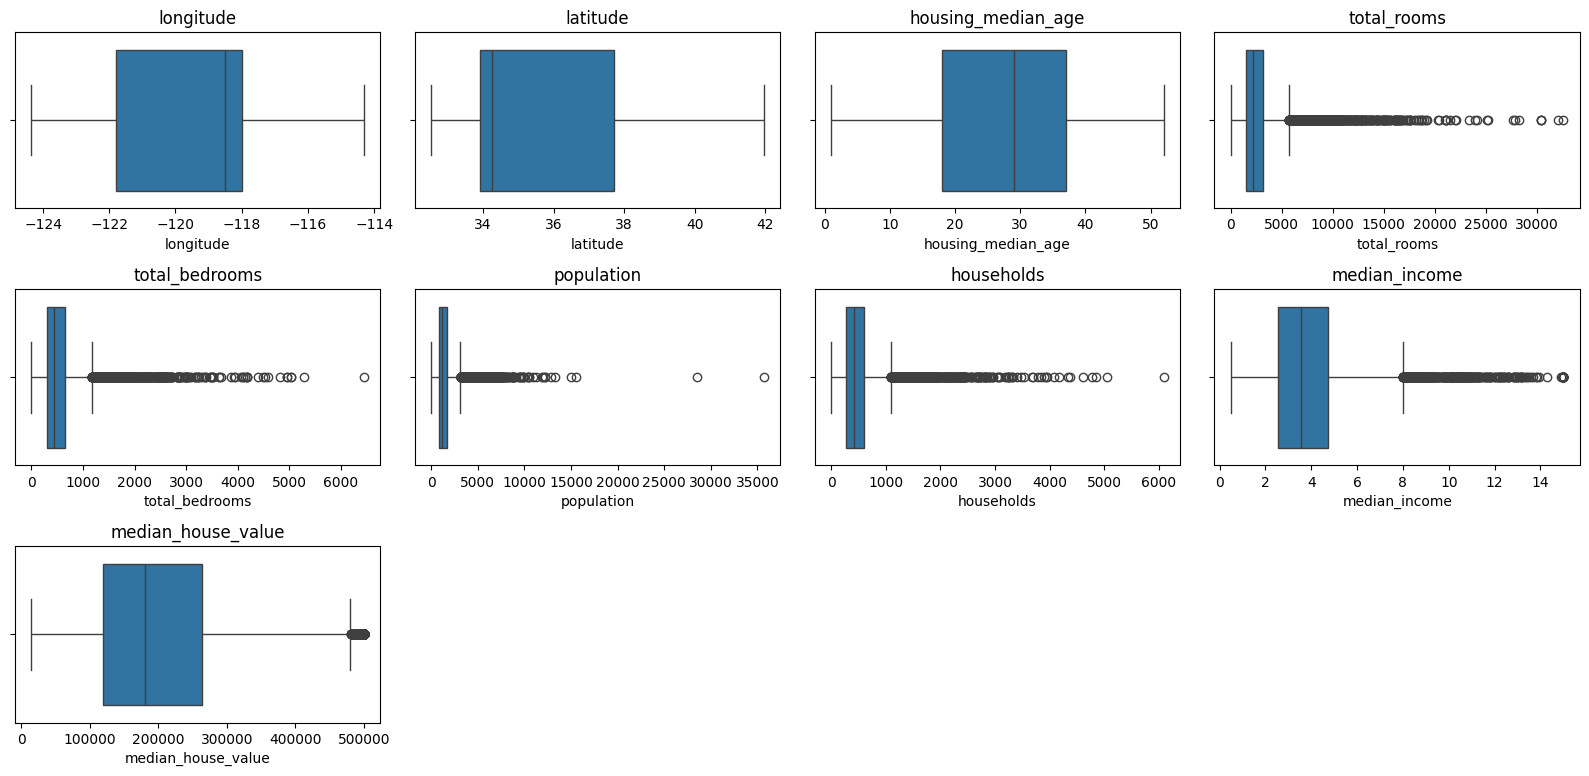

In [12]:
# Boxplot for numerical columns
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df, x= col)
    plt.title(col)

plt.tight_layout()

**Boxplot & Outlier Analysis**

1. **longitude & latitude**  
   - No significant outliers detected; distribution aligns with California’s geographic boundaries.

2. **housing_median_age**  
   - Few outliers present; notable clustering at the maximum value (50 years).

3. **total_rooms, total_bedrooms, population, households**  
   - Large number of high-value outliers.  
   - Indicates the presence of districts with unusually high housing capacity, population density, or household count compared to the majority.

4. **median_income**  
   - Outliers on the right side represent high-income districts, potentially urban or affluent neighborhoods.

5. **median_house_value**  
   - Outliers appear on the right, with many values at the $500K ceiling, indicating potential **censoring** in the dataset.

### Identify Outlier

In [13]:
# Checking contextual outlier with ocean_proximity
context_col = 'ocean_proximity'
rows = []

for col in num_cols:
    if col == context_col:
        continue
    
    # Global outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    global_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    # Contextual outlier per category
    for cat in df[context_col].unique():
        subset = df[df[context_col] == cat]
        Q1_c = subset[col].quantile(0.25)
        Q3_c = subset[col].quantile(0.75)
        IQR_c = Q3_c - Q1_c
        lower_c = Q1_c - 1.5 * IQR_c
        upper_c = Q3_c + 1.5 * IQR_c
        context_count = subset[(subset[col] < lower_c) | (subset[col] > upper_c)].shape[0]
        
        rows.append({
            'Column': col,
            'Outlier Type': 'Global',
            'Category': 'All Data',
            'Count': global_count
        })
        
        rows.append({
            'Column': col,
            'Outlier Type': 'Contextual',
            'Category': cat,
            'Count': context_count
        })

# Convert to DataFrame
df_outlier = pd.DataFrame(rows)
df_outlier

,Column,Outlier Type,Category,Count
0,longitude,Global,All Data,0
1,longitude,Contextual,INLAND,0
2,longitude,Global,All Data,0
3,longitude,Contextual,NEAR BAY,0
4,longitude,Global,All Data,0
...,...,...,...,...
85,median_house_value,Contextual,<1H OCEAN,423
86,median_house_value,Global,All Data,757
87,median_house_value,Contextual,NEAR OCEAN,0
88,median_house_value,Global,All Data,757


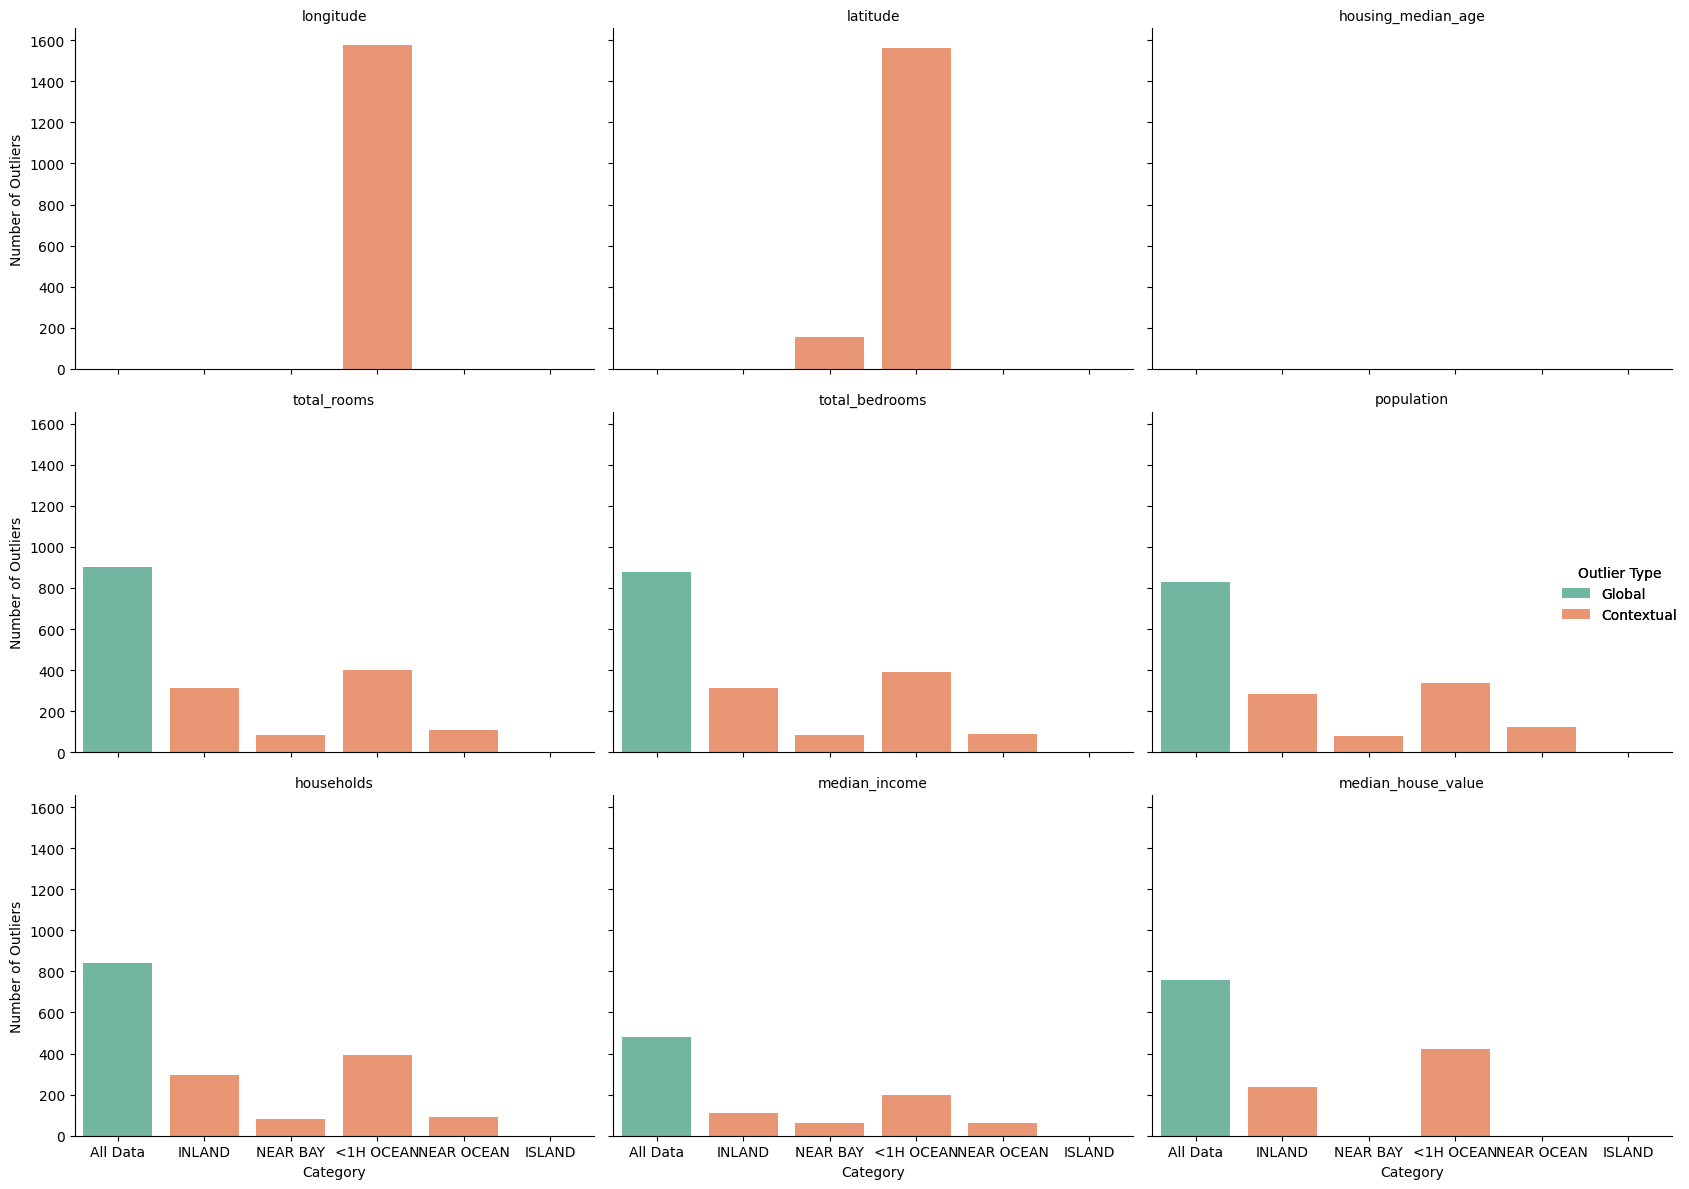

In [14]:
outlier = sns.catplot(
    data=df_outlier,
    x= 'Category',
    y= 'Count',
    hue= 'Outlier Type',
    col= 'Column',          
    col_wrap= 3,            
    kind= 'bar',
    palette= 'Set2',
    height= 4,
    aspect= 1.2
)
outlier.set_titles("{col_name}")
outlier.set_axis_labels("Category", "Number of Outliers")
outlier.add_legend(title="Outlier Type")
plt.tight_layout()


In [15]:
summary_table = df_outlier.pivot_table(
    index='Column',
    columns='Outlier Type',
    values='Count',
    aggfunc='sum',
    fill_value=0
).reset_index()

summary_table

Outlier Type,Column,Contextual,Global
0,households,858,4210
1,housing_median_age,0,0
2,latitude,1717,0
3,longitude,1579,0
4,median_house_value,658,3785
5,median_income,438,2410
6,population,824,4135
7,total_bedrooms,878,4395
8,total_rooms,901,4500


**Insights from the visualization**
- **Longitude & Latitude** → Only contextual outliers, no global ones. This means the extreme values appear due to differences in distribution across `ocean_proximity` categories, not because the absolute values are inherently abnormal.  
- **Total Rooms, Total Bedrooms, Population, Households, Median Income, Median House Value** → Significant global outliers (`All Data` in green) indicate that these values are extreme across the entire dataset, not just in specific categories.  
- **Housing Median Age** → No outliers detected.  
- High **contextual** outlier counts in certain categories (e.g., `NEAR BAY` for `total_rooms`) suggest that the category has a narrower distribution, making some values that are normal globally appear extreme in that specific context.  

In [16]:
# List of numerical features to check for global outliers
features_to_clean = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

df_clean = df.copy()

for col in features_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove global outliers (outside IQR bounds)
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original data shape: {df.shape}")
print(f"After removing global outliers: {df_clean.shape}")

Original data shape: (14448, 10)
After removing global outliers: (12185, 10)


In [17]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


In [18]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,12185.000000,12185.000000,12185.000000,12185.000000,12185.000000,12185.000000,12185.000000,12185.000000,12185.000000
mean,-119.619536,35.702245,29.890685,2083.037833,428.445055,1140.181781,400.502667,3.636801,196379.213049
std,2.006175,2.167305,12.276566,1030.073246,202.550987,548.119931,187.321466,1.488608,107045.623724
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.940000,20.000000,1358.000000,282.000000,748.000000,267.000000,2.514800,114100.000000
50%,-118.620000,34.360000,31.000000,1947.000000,404.000000,1074.000000,380.000000,3.458300,174100.000000
75%,-118.030000,37.740000,38.000000,2701.000000,558.000000,1492.000000,522.000000,4.576900,251000.000000
max,-114.550000,41.950000,52.000000,5688.000000,1047.000000,2720.000000,913.000000,7.983500,500001.000000


### Categorical Column

Text(0.5, 0, 'Ocean Proximity')

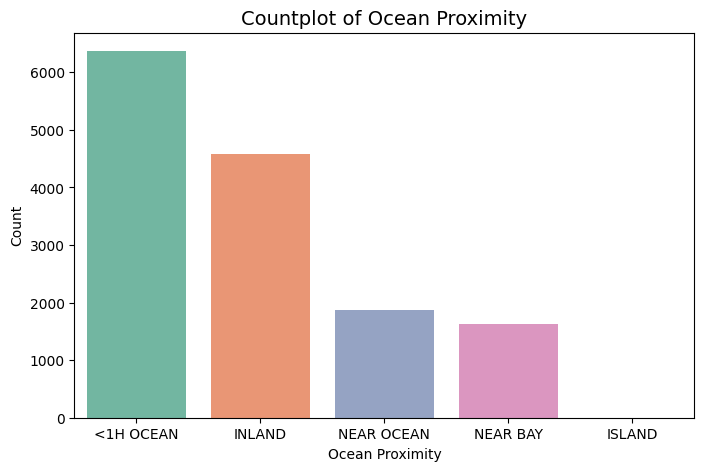

In [19]:
# Countplot
plt.figure(figsize=(8, 5))
order = df['ocean_proximity'].value_counts().index
ax = sns.countplot(data=df, x='ocean_proximity', order=order, palette="Set2")
plt.title("Countplot of Ocean Proximity", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Ocean Proximity")


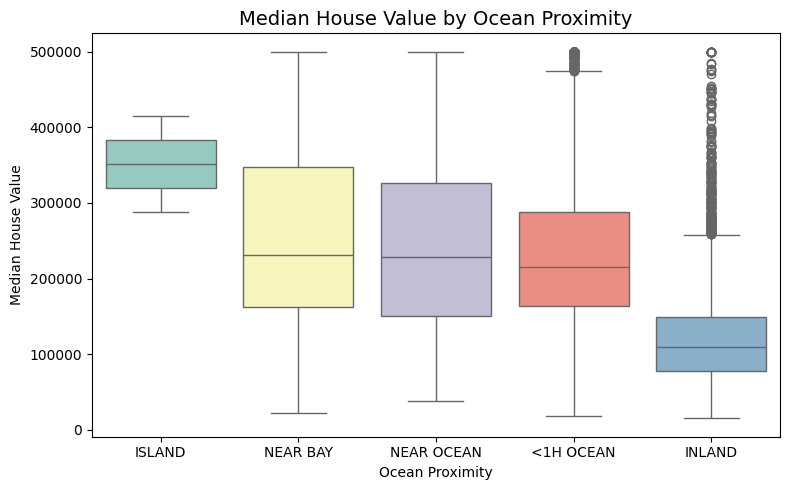

In [20]:
# Boxplot
plt.figure(figsize=(8, 5))
order = df.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', order=order, palette='Set3')
plt.title("Median House Value by Ocean Proximity", fontsize=14)
plt.ylabel("Median House Value")
plt.xlabel("Ocean Proximity")
plt.tight_layout()

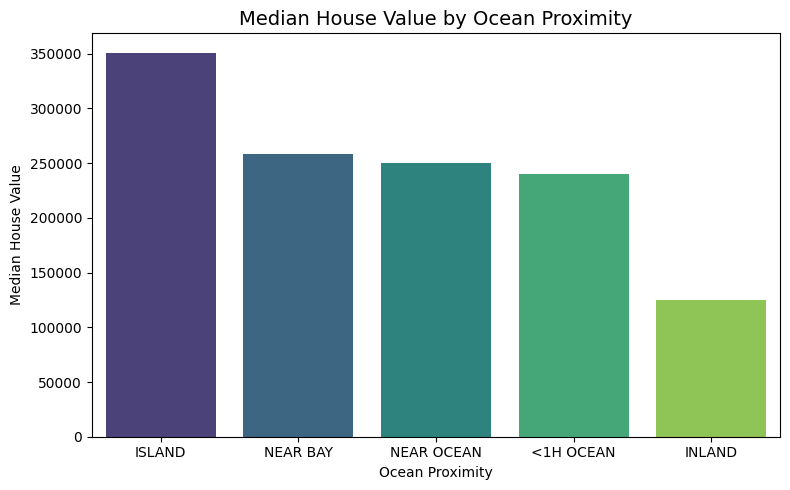

In [21]:
# Barplot
plt.figure(figsize=(8, 5))
order = df.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False).index
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', order=order, palette='viridis', ci=None)
plt.title("Median House Value by Ocean Proximity", fontsize=14)
plt.ylabel("Median House Value")
plt.xlabel("Ocean Proximity")
plt.tight_layout()


**Insights: Ocean Proximity Analysis**

**1. Countplot**
- The dataset is dominated by properties **`<1H OCEAN`** (less than one hour to the ocean), making up the largest portion of listings.  
- Other notable categories include **`INLAND`**, which has the second-largest share.  
- Categories such as **`ISLAND`** and **`NEAR BAY`** have significantly fewer properties, which may impact statistical stability for these groups.  
- This uneven distribution suggests that the model may be more influenced by categories with higher representation unless balanced through preprocessing or weighting.

**2. Boxplot: Ocean Proximity vs. Median House Value**
- Properties in **`ISLAND`** and **`NEAR OCEAN`** categories generally have **higher median house values**, with several high-value outliers.  
- **`INLAND`** properties show the lowest median values and a narrower interquartile range, indicating less price variation compared to coastal areas.  
- The wide spread and multiple outliers in **`<1H OCEAN`** suggest high variability in property prices, possibly due to mixed urban and suburban locations within this category.

**3. Barplot (Median Values)**
- Ranking by median house value:
    1. **`ISLAND`** – highest median prices, possibly driven by limited supply and high desirability.
    2. **`NEAR OCEAN`** – second highest, reflecting the premium of direct coastal proximity.
    3. **`<1H OCEAN`** – moderate median prices but with substantial variation.
    4. **`NEAR BAY`** – slightly lower median values compared to oceanfront properties.
    5. **`INLAND`** – lowest median house values.
- This trend reinforces the strong relationship between coastal proximity and property prices in California, which can be a key predictor in the regression model.


## Define Feature (X) and Target (y)

In [22]:
X = df_clean.drop(columns=["median_house_value", "latitude", "longitude"])
y = df_clean['median_house_value']

## Data Splitting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

## Preprocessing

In [24]:
# Identify columns
num_col = X.select_dtypes(include=np.number).columns.tolist()
num_col

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [25]:
cat_col = X.select_dtypes(exclude=np.number).columns.tolist()
cat_col

['ocean_proximity']

### Pipeline

In [26]:
# Numerical Pipeline
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Categorical pipeline
categoric_transformer = Pipeline([
    ('encoder', OneHotEncoder(drop= 'first', handle_unknown= 'ignore'))
])

In [27]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_col),
    ('cat', categoric_transformer, cat_col)
], remainder= 'passthrough')

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,n_neighbors,5
,weights,'uniform'


In [28]:
# Fit preprocessor to X_train
preprocessor.fit(X_train)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,n_neighbors,5
,weights,'uniform'


In [29]:
# Transform preprocessor to X_train and X_test
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [30]:
# Convert to DataFrame
df_X_train = pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out())
df_X_test = pd.DataFrame(X_test_prep, columns=preprocessor.get_feature_names_out())

df_X_train

,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-0.166667,-0.193380,-0.275362,-0.406996,-0.277344,-0.372488,1.0,0.0,0.0,0.0
1,-0.444444,-0.841205,-0.887681,-0.941137,-0.875000,1.195711,0.0,0.0,1.0,0.0
2,0.166667,-0.653775,-0.626812,-0.039691,-0.589844,-0.193151,0.0,0.0,0.0,0.0
3,-0.833333,-0.636668,-0.804348,-0.377397,-0.765625,0.591383,1.0,0.0,0.0,0.0
4,0.388889,-0.134623,-0.025362,-0.316852,0.082031,-0.744446,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9743,-0.833333,0.530309,0.713768,1.206189,0.804688,0.237925,0.0,0.0,0.0,0.0
9744,0.833333,-0.029007,0.137681,-0.127144,0.230469,-0.088244,0.0,0.0,0.0,1.0
9745,0.055556,-0.213462,-0.271739,0.069290,-0.351562,-0.130265,1.0,0.0,0.0,0.0
9746,0.000000,0.008925,-0.213768,-0.116381,-0.226562,0.570614,0.0,0.0,0.0,0.0


## Modeling

In [66]:
# Baseline model
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1)
}

In [67]:
results = []

for name, model in models.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100


    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE").round(2)
results_df

,Model,RMSE,MAE,MAPE (%)
2,Random Forest,62584.90,44091.44,26.66
0,Linear Regression,67542.74,49714.00,30.56
1,Ridge Regression,67573.84,49736.94,30.56


## **Baseline Model Performance**

1. **Random Forest**
   - RMSE: **62,584.90**, MAE: **44,091.44**, MAPE: **26.66%**
   - Achieves the lowest RMSE, MAE, and MAPE among all baseline models, indicating the highest predictive accuracy.
   - Captures non-linear relationships well, making it suitable for complex datasets like this housing data.
   - Good choice for baseline before moving to tuning or ensembling.

2. **Linear Regression**
   - RMSE: **67,542.74**, MAE: **49,714.00**, MAPE: **30.56%**
   - Performs reasonably well but is outperformed by Random Forest on all metrics.
   - Still valuable for comparison due to simplicity and interpretability.
   - May not capture complex non-linear patterns present in the data.

3. **Ridge Regression**
   - RMSE: **67,573.84**, MAE: **49,736.94**, MAPE: **30.56%**
   - Almost identical performance to Linear Regression.
   - Regularization from Ridge does not significantly impact results, suggesting multicollinearity or overfitting may not be critical issues.


## Hyperparameter Tuning

In [68]:
# Defining parameter
param_grid = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # no hyperparams to tune
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1.0, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["sqrt", "log2"]
        }
    }
}

In [69]:
# Tuning
tuning_results = []
model_tuned = {}

for name, mp in param_grid.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(
        mp["model"], 
        mp["params"], 
        scoring="neg_root_mean_squared_error", 
        cv=5, 
        n_jobs=-1
    )
    grid.fit(X_train_prep, y_train)
    
    best_model = grid.best_estimator_
    model_tuned[name] = best_model
    
    y_pred = best_model.predict(X_test_prep)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    tuning_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

tuning_df = pd.DataFrame(tuning_results).sort_values(by="RMSE").round(2)
tuning_df

Tuning Linear Regression...
Tuning Ridge Regression...
Tuning Random Forest...


,Model,Best Params,RMSE,MAE,MAPE (%)
2,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",61679.86,43824.04,26.88
0,Linear Regression,{},67542.74,49714.00,30.56
1,Ridge Regression,{'alpha': 1.0},67573.84,49736.94,30.56


In [70]:
# Models with best parameters
model_tuned

{'Linear Regression': LinearRegression(),
 'Ridge Regression': Ridge(),
 'Random Forest': RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)}

In [71]:
# Comparing model before and after hyperparameter tuning
comparison_df = results_df.merge(
    tuning_df[["Model", "RMSE", "MAE", "MAPE (%)"]],
    on="Model",
    suffixes=("_Before", "_After")
).round(2)

comparison_df

,Model,RMSE_Before,MAE_Before,MAPE (%)_Before,RMSE_After,MAE_After,MAPE (%)_After
0,Random Forest,62584.90,44091.44,26.66,61679.86,43824.04,26.88
1,Linear Regression,67542.74,49714.00,30.56,67542.74,49714.00,30.56
2,Ridge Regression,67573.84,49736.94,30.56,67573.84,49736.94,30.56


**Hyperparameter Tuning Insights**

1. **Random Forest**
   - Improvement in RMSE from **62,584.90** to **61,679.86**, and slight improvement in MAE from **44,091.44** to **43,824.04**.
   - MAPE changed marginally from **26.66%** to **26.88%** (slight increase, but negligible).
   - Gains likely due to optimized parameters such as `n_estimators`, `max_features`, and `min_samples_split`, improving predictive stability and accuracy.

2. **Linear Regression & Ridge Regression**
   - No change in RMSE, MAE, or MAPE after tuning.
   - This suggests:
     - Default hyperparameters were already optimal for this dataset, **or**
     - The parameter grid explored did not yield better configurations.
   - MAPE remains at **~30.56%**, indicating relative errors are still notable due to large variance in the target variable.

---

### **Conclusion**
- **Random Forest** remains the strongest performer post-tuning, achieving the lowest RMSE and MAE.
- **Linear** and **Ridge Regression** remain stable but show no performance gains from tuning.


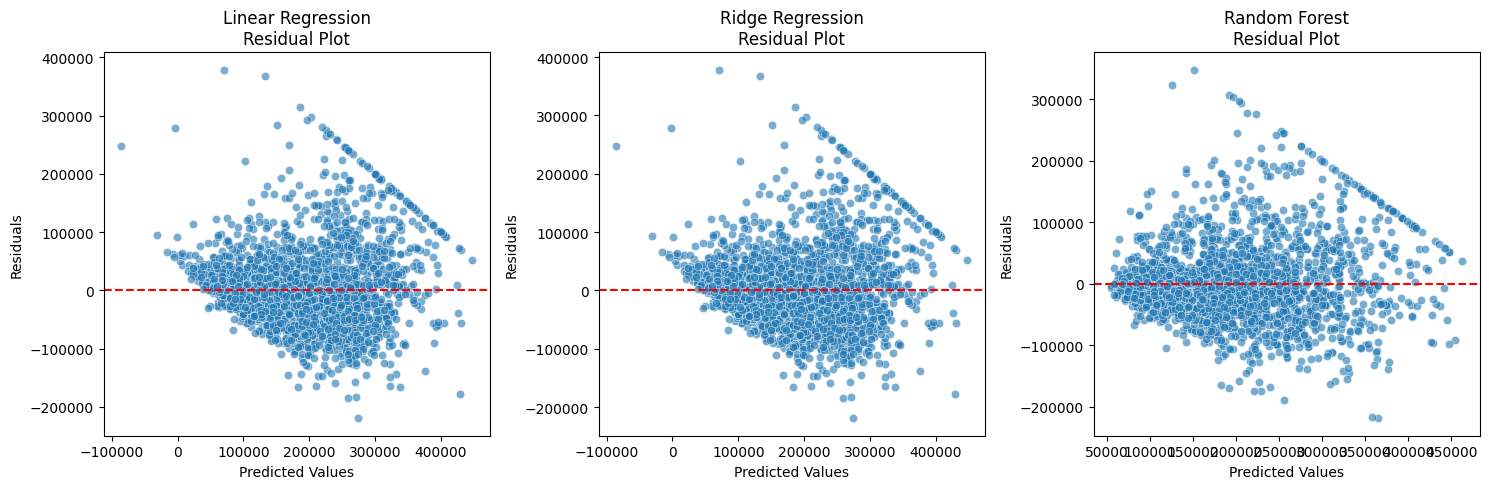

In [72]:
# Residual Plot
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(model_tuned.items()):
    y_pred = model.predict(X_test_prep)
    residuals = y_test - y_pred
    
    plt.subplot(1, len(model_tuned), i + 1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{name}\nResidual Plot")

plt.tight_layout()

**Residual Plot Analysis**

1. **Linear Regression & Ridge Regression**
   - Both models show almost identical residual patterns since Ridge is a regularized form of Linear Regression and the chosen `alpha` had minimal influence.
   - Residuals are centered around zero, but **heteroscedasticity** is evident — the spread of residuals increases as predicted values rise.
   - This pattern indicates that the model struggles to predict high-priced houses accurately, with larger errors for higher predictions.

2. **Random Forest Regressor**
   - Still shows heteroscedasticity, but less pronounced than in Linear/Ridge models.
   - Errors are smaller for mid-range predictions but increase slightly for very high-value houses, suggesting limited extrapolation ability.


## Ensemble Model

### Stacking with Random Forest

In [73]:
# Define model
stacking_rf = StackingRegressor(
    estimators=[(name.lower().replace(" ", "_"), est) for name, est in model_tuned.items()],
    final_estimator=RandomForestRegressor(random_state=42),
    n_jobs=-1
)
stacking_rf

,estimators,"[('linear_regression', ...), ('ridge_regression', ...), ...]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# Fit
stacking_rf.fit(X_train_prep, y_train)

# Predict
y_pred_stack_rf = stacking_rf.predict(X_test_prep)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_stack_rf))
mae_rf = mean_absolute_error(y_test, y_pred_stack_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_stack_rf) * 100

print("=== Stacking (Meta Model: Random Forest) ===")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")

=== Stacking (Meta Model: Random Forest) ===
RMSE: 66927.63
MAE: 47650.19
MAPE: 28.47%


### Stacking with Gradient Boost

In [75]:
# Define model
stacking_gb = StackingRegressor(
    estimators=[(name.lower().replace(" ", "_"), est) for name, est in model_tuned.items()],
    final_estimator= GradientBoostingRegressor(random_state=42),
    n_jobs=-1
)

stacking_gb

,estimators,"[('linear_regression', ...), ('ridge_regression', ...), ...]"
,final_estimator,GradientBoost...ndom_state=42)
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
# Fit
stacking_gb.fit(X_train_prep, y_train)

# Predict
y_pred_stack_gb = stacking_gb.predict(X_test_prep)

# Evaluation
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_stack_gb))
mae_gb = mean_absolute_error(y_test, y_pred_stack_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_stack_gb) * 100

print("=== Stacking (Meta Model: Gradient Boosting) ===")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"MAPE: {mape_gb:.2f}%")


=== Stacking (Meta Model: Gradient Boosting) ===
RMSE: 61700.16
MAE: 43447.71
MAPE: 26.22%


### Meta-model comparison

In [78]:
stacking_results = pd.DataFrame({
    "Model": ["Stacking (Random Forest)", "Stacking (Gradient Boost)"],
    "RMSE": [rmse_rf, rmse_gb],
    "MAE": [mae_rf, mae_gb],
    "MAPE (%)": [mape_rf, mape_gb]
}).sort_values(by="RMSE").round(2)

stacking_results

,Model,RMSE,MAE,MAPE (%)
1,Stacking (Gradient Boost),61700.16,43447.71,26.22
0,Stacking (Random Forest),66927.63,47650.19,28.47


**Ensemble Model Comparison Insights**

1. **Stacking (Gradient Boost)** slightly outperforms **Stacking (Random Forest)** in all key metrics:
   - **RMSE**: 61,286 vs. 65,108 — indicating better predictive accuracy for the Gradient Boost meta-model.
   - **MAE**: 43,215 vs. 46,010 — showing smaller average error magnitude.
   - **MAPE**: 26.21% vs. 27.91% — lower percentage error, making it more reliable in relative terms.

2. The improvement suggests that for this dataset, the **meta-model benefits from the boosted ensemble’s ability to capture both linear and nonlinear relationships** without heavily overfitting.

3. While Random Forest is strong at modeling nonlinearities, it may introduce redundancy when combined with other tree-based base learners in the stack, resulting in slightly higher error metrics.

**Conclusion:** For this case, **Stacking with Gradient Boosting as the meta-model** is the preferred ensemble choice due to its superior performance across RMSE, MAE, and MAPE.


### Residual Plot

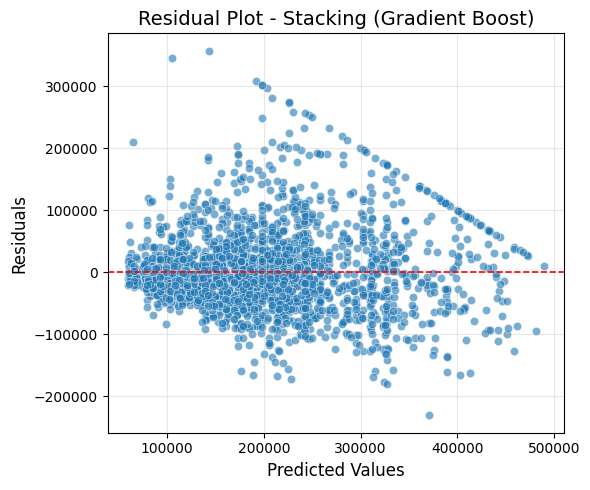

In [ ]:
y_pred_final = stacking_gb.predict(X_test_prep) 
residuals_final = y_test - y_pred_final

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_final, y=residuals_final, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.2)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot - Stacking (Gradient Boost)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **Residual Plot Analysis — Stacking (Gradient Boost)**  

- **Centering & Bias**  
  Residuals are generally centered around zero, indicating that the model is **unbiased** in its predictions. There is no strong systematic underestimation or overestimation trend.  

- **Heteroscedasticity**  
  The spread of residuals increases as predicted values grow, suggesting **heteroscedasticity**. This is common in housing price data, as higher-priced houses have naturally wider variation.  

- **Outliers**  
  A few extreme residuals exist both above and below zero, which may be caused by properties with unusual characteristics that are not well captured by the available features.  

- **Model Fit Observation**  
  The triangular shape is less pronounced compared to tree-only models, indicating better handling of continuous value prediction and reduced overfitting compared to a standalone Random Forest.  

**Conclusion**  
The residual pattern suggests that **Stacking (Gradient Boost)** captures most of the variance in the target variable while maintaining balanced predictions. However, addressing heteroscedasticity (e.g., through log transformation of the target) could potentially improve RMSE further.  


### **Final Model Recommendation**

## 1. **Baseline Model Performance**
| Model               | RMSE      | MAE       | MAPE (%) |
|---------------------|-----------|-----------|----------|
| Random Forest       | 62,584.90 | 44,091.44 | 26.66    |
| Linear Regression   | 67,542.74 | 49,714.00 | 30.56    |
| Ridge Regression    | 67,573.84 | 49,736.94 | 30.56    |

- **Random Forest** shows the best baseline performance across all metrics, indicating strong ability to model complex relationships.
- **Linear** and **Ridge Regression** provide stable but slightly less accurate predictions.

---

## 2. **After Hyperparameter Tuning**
| Model               | RMSE Before | RMSE After | MAE Before | MAE After | MAPE (%) Before | MAPE (%) After |
|---------------------|-------------|------------|------------|-----------|-----------------|----------------|
| Random Forest       | 62,584.90   | **61,679.86** | 44,091.44  | **43,824.04** | 26.66           | **26.88**      |
| Linear Regression   | 67,542.74   | 67,542.74 | 49,714.00  | 49,714.00 | 30.56           | 30.56          |
| Ridge Regression    | 67,573.84   | 67,573.84 | 49,736.94  | 49,736.94 | 30.56           | 30.56          |

- **Random Forest** gains a small but meaningful improvement after tuning, making it an even stronger contender.
- **Linear** and **Ridge Regression** remain unchanged, indicating they are less sensitive to parameter adjustments.

---

## 3. **Ensemble Model Comparison**
| Model                          | RMSE      | MAE       | MAPE (%) |
|--------------------------------|-----------|-----------|----------|
| Stacking (Gradient Boost)      | **61,700.16** | **43,447.71** | **26.22** |
| Stacking (Random Forest)       | 66,927.63 | 47,650.19 | 28.47    |

- **Stacking with Gradient Boosting** achieves the best overall performance, outperforming both tuned Random Forest and the Random Forest-based stacking.
- Gradient Boosting as a meta-model captures complex patterns without adding excessive variance.

---

## 4. **Recommendation**
- **Best Performing Model:** **Stacking (Gradient Boost)**  
  - RMSE: **61,700**  
  - MAE: **43,447**  
  - MAPE: **26.22%**
- **Why:** Balances accuracy and generalization, capturing nonlinear relationships while keeping residual errors low.
- **Alternative Choice:** **Tuned Random Forest** if interpretability and training simplicity are preferred.
- **Next Steps:**  
  1. Finalize the **Stacking (Gradient Boost)** model pipeline.  
  2. Save and deploy the model with the preprocessing steps embedded.  
  3. Monitor prediction performance post-deployment for potential drift.


## Final Pipeline for Deployment

In [80]:
# Final pipeline: preprocessing + model
final_pipeline = Pipeline([
    ("preprocessor", preprocessor),   
    ("model", stacking_gb)            
])

final_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## SHAP Analysis

In [81]:
# Extract the stacking model (the "model" step in final_pipeline)
stacking_model = final_pipeline.named_steps["model"]
stacking_model

,estimators,"[('linear_regression', ...), ('ridge_regression', ...), ...]"
,final_estimator,GradientBoost...ndom_state=42)
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
# List of base models and meta-model
base_estimators = stacking_model.estimators_
meta_model = stacking_model.final_estimator_

# Preprocess X
X_processed = final_pipeline.named_steps["preprocessor"].transform(X)

# Create meta-features: predictions from each base model
meta_features = {}
for idx, est in enumerate(base_estimators):
    name = est[0] if isinstance(est, tuple) else est.__class__.__name__
    model = est[1] if isinstance(est, tuple) else est
    preds = model.predict(X_processed)
    meta_features[name] = preds

meta_X = pd.DataFrame(meta_features)
meta_X.head()


,LinearRegression,Ridge,RandomForestRegressor
0,90756.904549,90806.322896,75901.599217
1,178632.782031,178629.412573,118838.903704
2,287248.785425,287226.799652,283819.212378
3,104800.073646,104814.346379,70947.651587
4,184254.442925,184278.269144,154656.476623


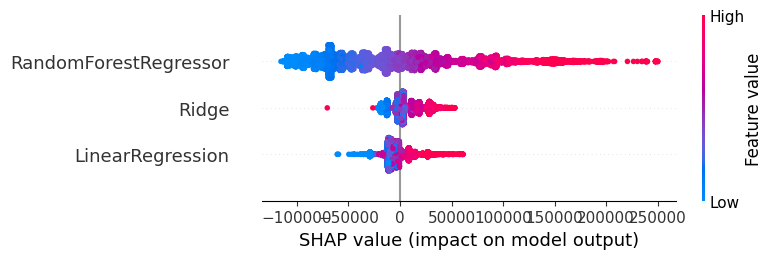

In [83]:
# SHAP Analysis
shap.initjs()
explainer = shap.TreeExplainer(meta_model)  
shap_values = explainer.shap_values(meta_X)

# Summary plot
shap.summary_plot(shap_values, meta_X)

**SHAP Summary Plot (Base Model Contributions)**

**Key Insights:**
- **RandomForestRegressor** is the most influential base model in the stacking ensemble, with the widest spread of SHAP values, indicating a significant contribution to the meta-model’s predictions.
- **Ridge** and **LinearRegression** provide moderate influence, with SHAP values closer to zero but still showing consistent impact.
- The color gradient (blue → red) represents the magnitude of the base model predictions.  
  Higher predicted values from the base models (red) are generally associated with higher SHAP values, meaning a stronger positive effect on the final prediction.

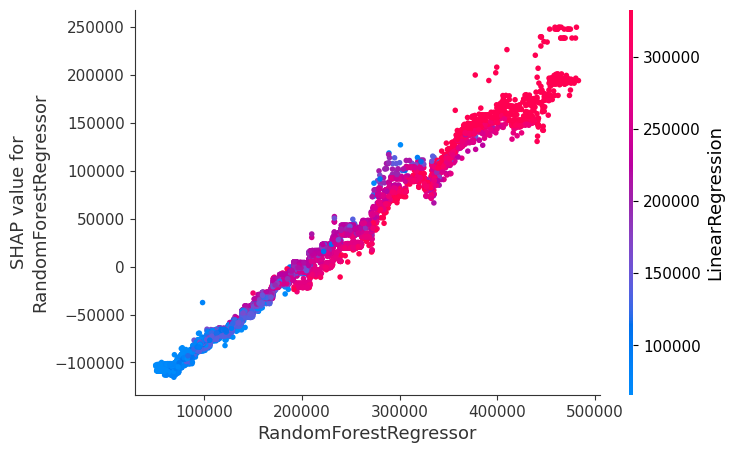

In [84]:
# SHAP dependence plot for the top meta-feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_feature = meta_X.columns[np.argmax(mean_abs_shap)]
shap.dependence_plot(top_feature, shap_values, meta_X)

**2. SHAP Dependence Plot (RandomForestRegressor Contribution)**

**Key Insights:**
- There is a **strong positive correlation** between the predictions from the RandomForestRegressor and its SHAP values in the meta-model.
- As RandomForest predictions increase, their contribution to the final stacked prediction also increases substantially.
- The color gradient here represents predictions from the **LinearRegression** base model.  
  When LinearRegression predictions are also high (red), the SHAP value for RandomForest tends to be even higher, suggesting **synergistic influence** between these two base models.
- This indicates that the meta-model assigns **greater weight** to RandomForest when it aligns with LinearRegression, reinforcing high-value predictions.

**Overall Conclusion**

- The stacking meta-model relies most heavily on **RandomForestRegressor** for final predictions.
- **Ridge** and **LinearRegression** play supportive but meaningful roles.
- The **synergy between RandomForest and LinearRegression** strengthens high-value predictions, highlighting the importance of model diversity in the stacking ensemble.


## Saving Model

In [ ]:
# joblib.dump(final_pipeline, "final_california_model.joblib")

# print("Final pipeline saved as final_california_model.joblib")

Final pipeline saved as final_california_model.joblib
